# Creating and searching against vector databases with TM-Vec

To form protein databases that are easily stored using vector embeddings, we will:
1. Generate a DB of protein vectors
2. Convert our output to a FAISS DB (for search)
3. Search against our DB and plot the results

In [1]:
# import necessary functions
import pandas as pd
import numpy as np
from skbio.io import read
from skbio.embedding import ProteinVector
import skbio.embedding as emb

## Helper Functions

In [2]:
def load_vectors(file_path, sequence_list : list):
      data = np.load(file_path)
      vectors = data['embeddings']
      
      protein_vectors = [ProteinVector(vector, sequence) for vector, sequence in zip(vectors, sequence_list)]
      return protein_vectors

## Building a vector database

We can directly feed our FASTA file into the tmvec build_db __CLI__ function, which will output our 
vectors as a .npz file in the specified directory.

This function takes in as an input:
1. --input-fasta: A FASTA file containing your sequences.
2. --output: the file location to output to.

In [ ]:
!tmvec build-db --input-fasta bagel.fa --output test_db/bagel_fasta

## Plot the ordination results

Now, with our FAISS DB in hand, we can use the search __CLI__ function to search for proteins against our database, and return the k-nearest neighbors results.  

Finally, we can utilize the embed_vec_to_ordination function to create ordination objects from our search and plot them.

In [ ]:
!tmvec search --input-fasta bagel.fa --database test_db/bagel_fasta.npz --output test_db/bagel_search_results --output-fmt skbio

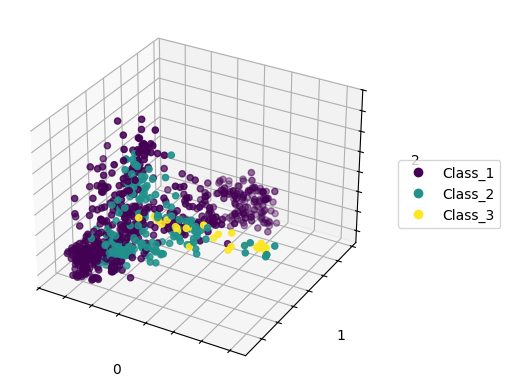

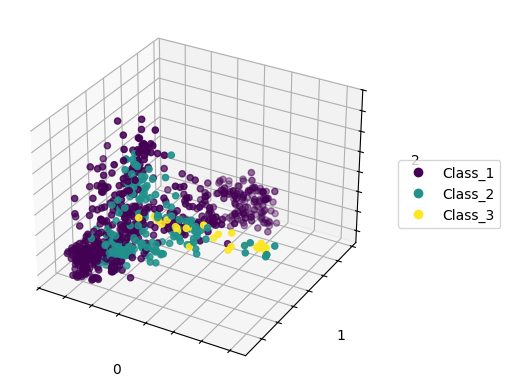

In [3]:
# load sequences
sequence_list = read("bagel.fa", format='fasta')

#read in vectors to generator object
vec_generator = load_vectors("test_db/bagel_fasta.npz", sequence_list)

ord_results = emb.embed_vec_to_ordination(vec_generator)

df = pd.read_csv("bagel_bacteriocins_all_classes.csv")
df = df.dropna(subset=['Sequence']).set_index('Sequence')
df = df.groupby('Sequence').first()

common_ids = list(set(ord_results.samples.index) & set(df.index))

df = df.loc[common_ids]
ord_results.samples = ord_results.samples.loc[common_ids]

# plot the results
ord_results.plot(df, column='class', title='Bacteriocin Sequence TM-Scores')